In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #repeatly split the train and test data
import statsmodels.api as sm
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
Letters_df = pd.read_csv('D:/Mahdieh_CourseUniversity/University_courses/ALY6020/Module_5/letters.csv')

In [50]:
Letters_df.isnull().sum()

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [51]:
Letters_df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
Letters_df.shape

(42000, 46)

In [ ]:
# indicate predictor and predicted variables

y = Letters_df['label']

x = Letters_df.drop(['label'], axis=1)

#split our data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
y_train = Letters_df["label"].copy().to_numpy()
x_train = Letters_df.drop(columns=["label"]).to_numpy()

print("The training digits data:\n", x_train)
print("Digit labels: ", y_train)

# Similarly for the test set
y_test = Letters_df["label"].copy().to_numpy()
x_test = Letters_df.drop(columns=["label"]).to_numpy()

The training digits data:
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...  17   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 227 ...   0   0   0]]
Digit labels:  [1 0 1 ... 2 2 2]


In [6]:
print(y_train[5])

0


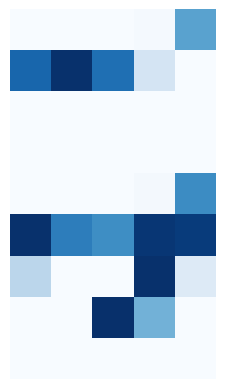

In [7]:

some_digit_data = x_train[5]
some_digit_image = some_digit_data.reshape(9, 5)

# imshow plots the matrix
plt.imshow(some_digit_image, cmap=plt.cm.Blues)
plt.axis("off")
plt.show()

In [8]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)
        
        digit = data[i]
        digit_image = digit.reshape(9, 5)
        
        plt.imshow(digit_image, cmap=plt.cm.Blues)
        plt.axis("off")

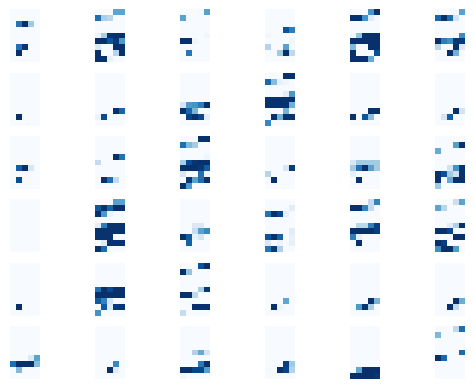

In [9]:
plot_digits(x_train[:36], row_size=6)
plt.show()

In [10]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
# examine KNN and find optimal K

k_range = list(range(1,15))
accuracy = []

for i in k_range:

    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

In [24]:
accuracy # the optimal k is 1 with the 96% accuracy


[0.9620952380952381,
 0.7746190476190477,
 0.7572619047619048,
 0.7500238095238095,
 0.7401904761904762,
 0.7293571428571428,
 0.7233095238095238,
 0.7171190476190477,
 0.7128571428571429,
 0.708452380952381,
 0.7044523809523809,
 0.7006904761904762,
 0.6988095238095238,
 0.6948333333333333]

In [32]:
# perform model with optimal K

knn = KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
y_predict = knn.predict(x_test)

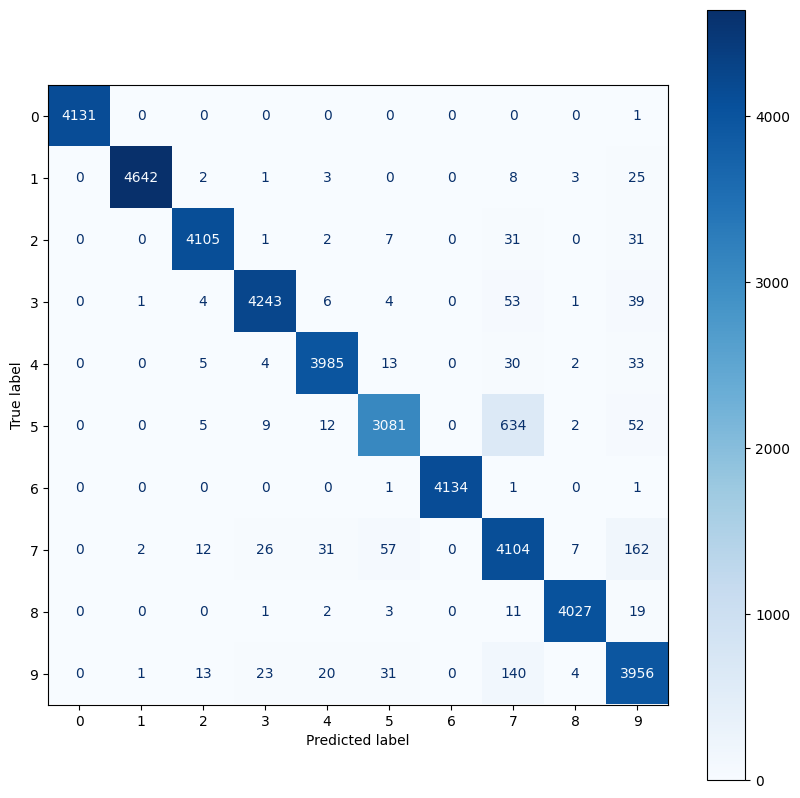

In [33]:
# Build the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_mat = confusion_matrix(y_test, y_predict)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [31]:

print(metrics.classification_report(y_test, y_predict)) 
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      0.99      1.00      4684
           2       0.99      0.98      0.99      4177
           3       0.98      0.98      0.98      4351
           4       0.98      0.98      0.98      4072
           5       0.96      0.81      0.88      3795
           6       1.00      1.00      1.00      4137
           7       0.82      0.93      0.87      4401
           8       1.00      0.99      0.99      4063
           9       0.92      0.94      0.93      4188

    accuracy                           0.96     42000
   macro avg       0.96      0.96      0.96     42000
weighted avg       0.96      0.96      0.96     42000

[[4131    0    0    0    0    0    0    0    0    1]
 [   0 4642    2    1    3    0    0    8    3   25]
 [   0    0 4105    1    2    7    0   31    0   31]
 [   0    1    4 4243    6    4    0   53    1   39]
 [   0    0    5    4 3985   

In [17]:
from sklearn.metrics import classification_report

def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

In [18]:
class_report(y_train, y_predict)


Classification report:

               precision    recall  f1-score   support

           0   0.826039  0.909003  0.865538      4132
           1   0.783164  0.955380  0.860742      4684
           2   0.696692  0.655494  0.675466      4177
           3   0.627823  0.600552  0.613885      4351
           4   0.745221  0.555255  0.636364      4072
           5   0.715163  0.582872  0.642276      3795
           6   0.848443  0.895818  0.871487      4137
           7   0.521183  0.712793  0.602111      4401
           8   0.676416  0.535073  0.597499      4063
           9   0.538658  0.504059  0.520785      4188

    accuracy                       0.694833     42000
   macro avg   0.697880  0.690630  0.688615     42000
weighted avg   0.697137  0.694833  0.690314     42000



In [36]:
# examine neural networks

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='sgd',learning_rate_init= 0.01 , max_iter= 15000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.7416666666666667

In [34]:
expected_y  = y_test
predicted_y = mlp.predict(x_test)
print(metrics.classification_report(expected_y, predicted_y)) 
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4132
           1       0.90      0.94      0.92      4684
           2       0.81      0.71      0.76      4177
           3       0.71      0.63      0.66      4351
           4       0.85      0.63      0.72      4072
           5       0.72      0.73      0.72      3795
           6       0.94      0.95      0.94      4137
           7       0.50      0.74      0.60      4401
           8       0.70      0.65      0.67      4063
           9       0.51      0.48      0.49      4188

    accuracy                           0.74     42000
   macro avg       0.75      0.74      0.74     42000
weighted avg       0.75      0.74      0.74     42000

[[3886    2   59   12   36   14   27   47   10   39]
 [   0 4401   13   18   46   48   23    6   81   48]
 [ 158   41 2983  240   60   64   17  171  328  115]
 [  23   55  339 2724   40  295   14  137  480  244]
 [  29  137   13   28 2564   

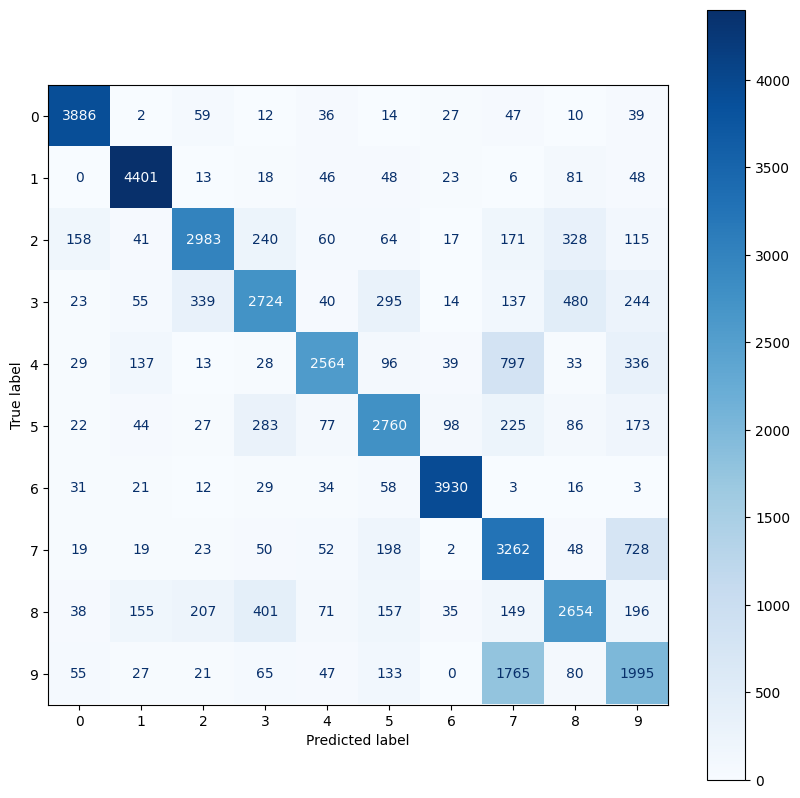

In [35]:
# Build the confusion matrix
cf_mat = confusion_matrix(y_train, predicted_y)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [93]:
from sklearn.metrics import classification_report

def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

In [102]:
class_report(y_train, predicted_y)


Classification report:

               precision    recall  f1-score   support

           0   0.908983  0.930542  0.919636      4132
           1   0.880721  0.948975  0.913575      4684
           2   0.829395  0.689011  0.752713      4177
           3   0.713285  0.631809  0.670079      4351
           4   0.826378  0.637033  0.719456      4072
           5   0.699605  0.746245  0.722173      3795
           6   0.922008  0.945854  0.933779      4137
           7   0.534541  0.650534  0.586861      4401
           8   0.668560  0.666256  0.667406      4063
           9   0.490905  0.534862  0.511941      4188

    accuracy                       0.739667     42000
   macro avg   0.747438  0.738112  0.739762     42000
weighted avg   0.747815  0.739667  0.740726     42000

